# Project: Investigate a Dataset - [No-Show appointments] 


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in **Brazil** and is focused on the question of whether or not patients show up for their appointment. 


>A number of characteristics about the patient are included in each row.


>- ScheduledDay tells us on what day the patient set up their appointment


>- Gender  to know the gender of patient


>- Age	


>- `[Hipertension	Diabetes	Alcoholism	Handcap ]` columns     to show if patient have those illnesses  or not   


>- Neighborhood indicates the location of the hospital. 
 
 
>- Scholarship indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://www.google.com/url?q=https://en.wikipedia.org/wiki/Bolsa_Fam%25C3%25ADlia&sa=D&ust=1532469042119000). 

 
> Be careful about the encoding of the last column [NO-show]: it says Noif the patient showed up to their appointment, and Yes if they did not show up


 > you can see the data on [kaggle](https://www.google.com/url?q=https://www.kaggle.com/joniarroba/noshowappointments&sa=D&ust=1532469042118000)

### Question(s) for Analysis
>-What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment


>-does is there a patient who show up  go to Neighbourhood more than once if yes count of patients and find precentage of them    for people who show up   and   precentage of patients  who show up from all patients?


>-What percentage from each category are patients who do show (No) and  patients who do not show (Yes)


>-does is there a patient who show up  go to Neighbourhood more than once if yes count of patients and find precentage of them for people who show up  ? 
 
>-what is the most day and most month  in which  patients who showed up    went to hospital  


>-five number summary of patient's age 


>-what is the percentage for each life stage 


>-which gender   have maximium  number of patients


>-what is the relation between differnt illness and life stage 


>-how many males and female have all illnesses 


>-what is the top ten  Neighbourhood  whose  pateints who have Scholarship 




In [1]:
#  importing labir
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Data Gathering 

In [2]:
# Loading  the  data 
df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

### Accessing Data

In [3]:
# print first five rows 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# get datatypes of data and non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#check count of null values in each ccolumn 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
#check duplacted rows
sum(df.duplicated())

0

In [7]:
#check dduplicated in PatientId columcolumn 
sum(df.PatientId.duplicated())

48228

In [8]:
# view num of duplicated values for  each patients have duplicated  patient id 
id_duplicate = df[df.PatientId.duplicated() == True]
id_duplicate.PatientId.value_counts()

8.221459e+14    87
9.963767e+10    83
2.688613e+13    69
3.353478e+13    64
6.264199e+12    61
                ..
2.539324e+14     1
5.677162e+11     1
2.154335e+09     1
5.118325e+13     1
3.775115e+14     1
Name: PatientId, Length: 24379, dtype: int64

In [9]:
# show unique values for some columns in dataset 
selected_columns=['Gender', 'Age',
        'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show']
for i in selected_columns:
    print(f"unique values of columns {i} are :{df[i].unique()}\n")

unique values of columns Gender are :['F' 'M']

unique values of columns Age are :[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]

unique values of columns Scholarship are :[0 1]

unique values of columns Hipertension are :[1 0]

unique values of columns Diabetes are :[0 1]

unique values of columns Alcoholism are :[0 1]

unique values of columns Handcap are :[0 1 2 3 4]

unique values of columns SMS_received are :[0 1]

unique values of columns No-show are :['No' 'Yes']



In [10]:
#check age less than zero
df[df.Age <0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


##### problems to slove 

>- some columns name should be changed   (AppointmentID to Appointment_ID  ,ScheduledDay  to Scheduled_Day ,AppointmentDay  to Appointment_Day  ,No-show to No_show.


>- make name of columns lower case  


>- PatientId should be intger dtype  and 12 14 num


>- set patientid as index 


>- set gender Male instead of M and Female instead of F 


>- ScheduledDay should be datetime in format  %Y-%m-%d %H:%M:%S


>- AppointmentDay should be datetime  "%Y-%m-%d"


>- Neighbourhood convert cell to lower characters instead of upper characters 


>- there is patient whose age equal -1   should be moved to a separted dataframe


### Data Cleaning

 

In [11]:
# rename columns 
df.rename(columns={"PatientId":"Patient_Id","AppointmentID":"Appointment_ID","ScheduledDay":"Scheduled_Day"
                   ,"AppointmentDay":"Appointment_Day","No-show":"No_show"},inplace=True)
df.rename(columns=lambda x: x.lower(),inplace=True)

In [12]:
#test 
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# patient_id should be intger 
df.patient_id=df.patient_id.astype(np.int64)

In [14]:
#test
df.patient_id.dtype

dtype('int64')

In [15]:
# make Patient_Id  as index and drop duplicated colunm patient_id 
df=df.set_index(df.patient_id)
df=df.drop('patient_id',axis=1)

In [16]:
#- set gender Male instead of M and Female instead of F 
df.gender=df.gender.apply(lambda male : male.replace("M","male"))
df.gender=df.gender.apply(lambda female : female.replace("F","female"))

In [17]:
#test 
df.gender.unique()

array(['female', 'male'], dtype=object)

In [18]:
#Scheduled_Day to  datetime dtype
######  to get scheduled_day column in format like this %y-%m-%d %H:%M:%S
df.scheduled_day=pd.to_datetime(df.scheduled_day).dt.strftime('%Y-%m-%d %H:%M:%S')
##### to get appointment_day column in format like this %y-%m-%d
df.appointment_day=pd.to_datetime(df.appointment_day).dt.strftime('%Y-%m-%d')

for i in  ["appointment_day","scheduled_day"]: #to convert appointment_day and  scheduled_day datatype to datetime64
     df[i]=pd.to_datetime(df[i])

In [19]:
#test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 29872499824296 to 377511518121127
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   appointment_id   110527 non-null  int64         
 1   gender           110527 non-null  object        
 2   scheduled_day    110527 non-null  datetime64[ns]
 3   appointment_day  110527 non-null  datetime64[ns]
 4   age              110527 non-null  int64         
 5   neighbourhood    110527 non-null  object        
 6   scholarship      110527 non-null  int64         
 7   hipertension     110527 non-null  int64         
 8   diabetes         110527 non-null  int64         
 9   alcoholism       110527 non-null  int64         
 10  handcap          110527 non-null  int64         
 11  sms_received     110527 non-null  int64         
 12  no_show          110527 non-null  object        
dtypes: datetime64[ns](2), int64(8), object(3)
memory usa

In [20]:
# Neighbourhood convert cell to lower characters instead of upper characters
df.neighbourhood=df.neighbourhood.str.lower()

In [21]:
#test 
df.neighbourhood

patient_id
29872499824296       jardim da penha
558997776694438      jardim da penha
4262962299951          mata da praia
867951213174       pontal de camburi
8841186448183        jardim da penha
                         ...        
2572134369293            maria ortiz
3596266328735            maria ortiz
15576631729893           maria ortiz
92134931435557           maria ortiz
377511518121127          maria ortiz
Name: neighbourhood, Length: 110527, dtype: object

In [22]:
# put patient whose age -1 in speated dataframe
out_df=df.query("age <0")
## drop it  dataframe
df=df.drop([465943158731293])

In [23]:
#test
df.query("age <0")

,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
patient_id,,,,,,,,,,,,,


<a id='eda'></a>
## Exploratory Data Analysis





In [24]:
def write_text_on_axis(xlabel,ylabel,title): 
    """ this functios is used to take 
     (str)  xlabel  string to write it on x-axis of plot 
     (str)  ylabel  string to write it on y-axis of plot 
     (str)  title   string to make it as title of plot 
    
    """

    plt.xlabel(xlabel) 
    plt.ylabel(ylabel)
    plt.title(title)

### 1-What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment  and precentage of patients  who show up from all patients?

In [25]:
show_up_data=df.query("no_show =='No'")   # get data of patient showed up
No_show_up_data=df.query("no_show !='No'")  # get data of patient they did not show up.

show_up_data.describe().round(3) # get summary statistics for patient showed up  of different factor related to no show

,appointment_id,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,88207.000,88207.000,88207.000,88207.000,88207.000,88207.000,88207.000,88207.000
mean,5681135.438,37.791,0.094,0.204,0.074,0.030,0.023,0.291
std,69311.926,23.339,0.292,0.403,0.262,0.172,0.163,0.454
min,5030230.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,5646217.500,18.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,5685683.000,38.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,5731077.500,56.000,0.000,0.000,0.000,0.000,0.000,1.000
max,5790484.000,115.000,1.000,1.000,1.000,1.000,4.000,1.000


In [26]:
## get precentage of patients who show_up from all data set 
precentage_patients_show_up=str(round((show_up_data.shape[0]/df.shape[0])*100))+"%"  
precentage_patients_show_up

'80%'

>patients  showed up about less than  25% of them  had illnesses(Hipertension-Alcoholism-Alcoholism-Alcoholism-Handcap,  
average age about 38 years  and about of 80% of all patients

#### 2-does is there a patient who show up  go to Neighbourhood more than once if yes count of patients and find precentage of them for people who show up  ? 

In [27]:
# get count of times of patient who show up tp  go to hospital
patients_who_show_up =show_up_data.groupby([show_up_data.index]).count()["appointment_id"] 
#get count of times of patient who show up tp  go to hospital who go more than once 
patients_who_show_up_more_one=patients_who_show_up[patients_who_show_up>1].shape[0]
#find prestange of them 
presentage=str(round((patients_who_show_up_more_one/show_up_data.shape[0] )*100))+"%"
presentage

'21%'

>about 21 % of patients who go to hosiptal in thier appointment go more than once

#### 3-What percentage from each category are patients who do show (No) and  patients who do not show (Yes)

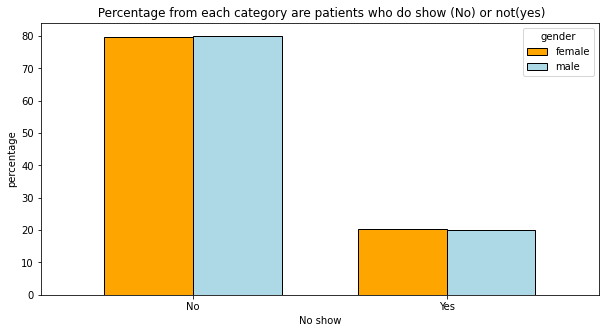

In [28]:
# get percentage from each category are patients who do show (No) and  patients who do not show (Yes) and make a bar chart for it 
df.groupby("gender")["no_show"].value_counts(normalize=True).mul(100).unstack("gender").plot.bar(edgecolor="black",
                                                                                        figsize=[10,5],
                                                                                        rot=0,
                                                                                        width=.7,
                                                                                       color=["orange","lightblue"]);
# write good string in xlabel and ylabel and title 
write_text_on_axis("No show","percentage"," Percentage from each category are patients who do show (No) or not(yes)")

>  about 80% of males and females do show up and about 20% of males and females do not  show up 

### 4-what is the most day and most month  in which  patients who showed up    went to hospital  

#### most day

In [29]:
days_count=df.appointment_day.value_counts() # get count of appointment day for patients who showed up
days_count.idxmax()

Timestamp('2016-06-06 00:00:00')

#### most month

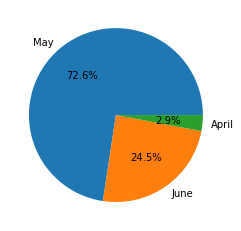

In [30]:
month_show_up_count=show_up_data.appointment_day.dt.month_name().value_counts()   # get count for months in showed up data 
plt.pie(month_show_up_count,labels=month_show_up_count.index,autopct="%.1f%%");  # make a pie plot for months in show up data 

> May is The most stressful month in hospitals and 2016-06-06 is The most stressful day in hospitals 

###  5-five number summary of patient's age 

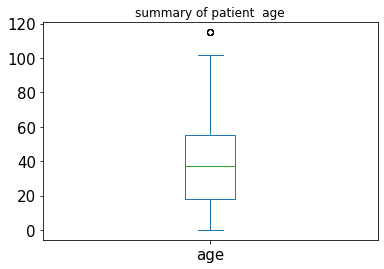

In [31]:
df.age.plot(kind="box",fontsize=15) # to draw age summary as box plot 
write_text_on_axis("","","summary of patient  age")  # to write title for photo

In [32]:
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

> the averge age of patients is 37 years old and it has range from 0 to 115 years old

In [33]:
def make_pie_q5_q6(column_to_group_by,labels,title):
    ''' this function take column name to count every uunique value of it and plot it in pie chart 
    (str) column_to_group_by  columns to groupby
    (list) labels             labels to use it in pie chart 
    (str) title               string to make it the title of plot
    '''
    plt.figure(figsize=(4,4), dpi = 100) # to increase the quality of plot ,to Identifies the plot size
    column_to_group_by_count=df.groupby(column_to_group_by).count()["appointment_id"]  # to count number column_to_group_by in  data  set
    
    plt.pie(column_to_group_by_count,labels=labels,autopct="%.1f%%");  # to make pie plot
    plt.title(title); # ti make pie title 

### 6- what is the percentage for each life stage 
- Infant = 0-1 year
- Toddler = 2-4 yrs
- Child = 5-12 yrs
- Teen = 13-19 yrs
- Adult = 20-39 yrs
- Middle Age Adult = 40-59 yrs
- Senior Adult = 60+

In [34]:
# i will make a columns which Identifies the life stage of person
bins=[0,1,4,12,19,39,59,115] # bins to make ranges 
life_stage_labels=["Infant","Toddler","Child","Teen","Adult","Middle Age Adult","Senior Adult"] # life stages for each range 
df.insert(5,"life_stage",pd.cut(df.age,bins=bins,labels=life_stage_labels,include_lowest=True)) # make inserting for columns contain life stage 

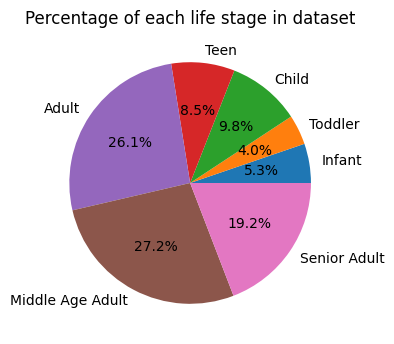

In [35]:
# make a pie plot for life stages
make_pie_q5_q6("life_stage",life_stage_labels,"Percentage of each life stage in dataset")

>about 27.2% of patients were middle age adult( 40-59 years) , 26.1 % are adult(20-39 years )  and 19.2 are senior adult(60+)  and about 27.6 are less than 18 years old

### 7- which gender   have maximium  number of patients 

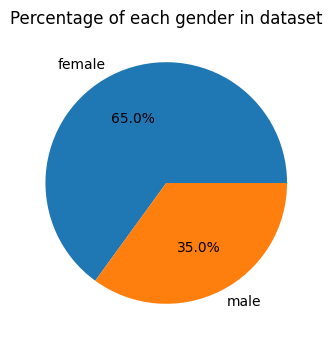

In [36]:
make_pie_q5_q6("gender",["female","male"],"Percentage of each gender in dataset") # make a pie chart for genders 

> about 65% of patients are females and 35% are males

### 8- what is the relation between differnt illness and life stage 
`['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']`

In [37]:
def illnes_and_life_style(illness): # this function plot realtion of illnes anf lif stage 
    
    ''' 
    this function  is used for get data of patients  disease to get the percentage  
    of patients with it  and patients without it  for each life stage then draw a bar chart for this
    
    
    (str) illness     string of  illness to get the percentage  of patients with it  and patients without it 
    ''' 
    temp=df.copy() # get copy of data frame  for not modifing the  orginal data
    temp[f"has {illness}"]=df[illness]!=0   #make a columns to check the patiens have specific disease or not 
    
    # get the precentage of each life stage have specific disease  and precentage of not having 
    illness_num_lifestage=temp.groupby("life_stage")[f"has {illness}"].value_counts(normalize=True).mul(100).unstack() 
    # make a bar chart between lif stage and precentage 
    illness_num_lifestage.plot.bar(edgecolor="black",rot=0,width=.8,stacked=True,figsize=[14,4])
    # to write good strings on axis xlabel andd ylabel and title 
    write_text_on_axis("life stage",f"precentage".title(),f"patients who have {illness} and thier life stages".title()) 

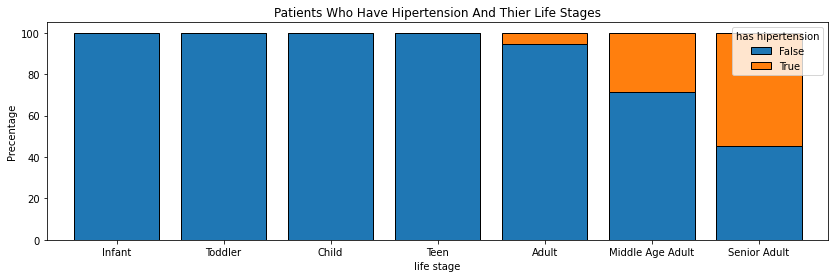

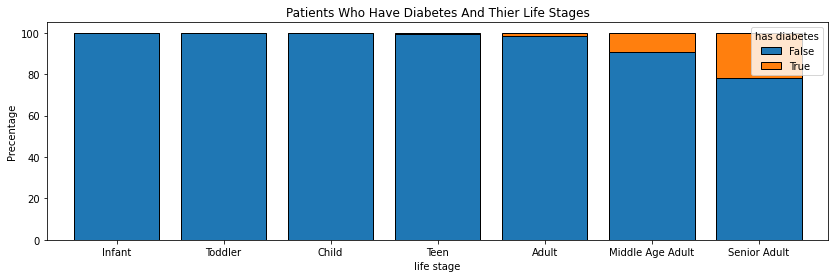

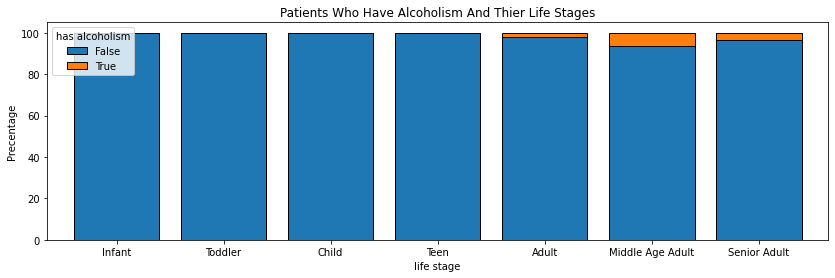

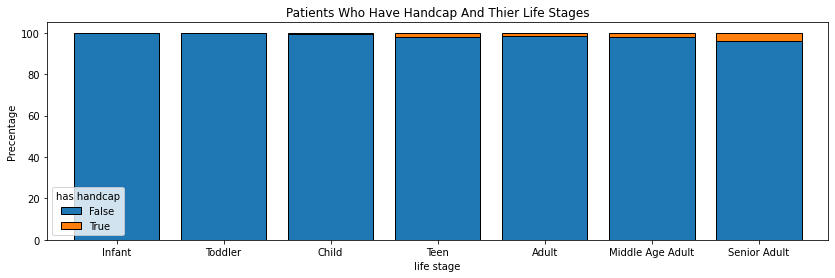

In [38]:
for i in ['hipertension', 'diabetes', 'alcoholism', 'handcap']: # to draw every illness vs life stage in simple way
    illnes_and_life_style(i)

>increasing the age of patients make number of patients in illness `[Hipertension	Diabetes Handcap ]` increase until reach maximium number of patients in senor adults(60+ years old), but in alcoholism illness increasing the age of patients make number of patients in illness until reach maximium number of patients in middle age adult (40-59 years old ) but decrease in senor adults(60+ years old)  and  number of whiole patients decreased from patients of illness 'hipertension' to illness 'diabetes', to illness 'alcoholism',to illness 'handcap'

### 9-how many males and female have all diseases 

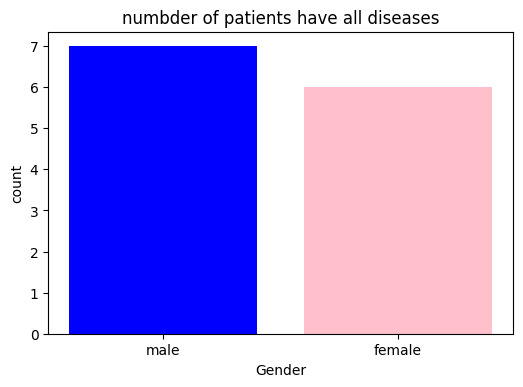

In [39]:
pat_have_all=df.query("handcap>0 and alcoholism >0 and diabetes>0 and hipertension > 0 ") # make query to get gender have all illness
pat_have_all_count=pat_have_all.gender.value_counts() # count feamle and males 
plt.figure( dpi = 100) # to increase the quality of plot 
plt.bar(pat_have_all_count.index,pat_have_all_count.values,color=["blue","pink"]);
 # to write good strings on axis xlabel andd ylabel and title 
write_text_on_axis("Gender","count","numbder of patients have all diseases")

 > about 7 males and 6 females have all diseases

### 10-what is the top ten  Neighbourhood  whose  pateints who have Scholarship 

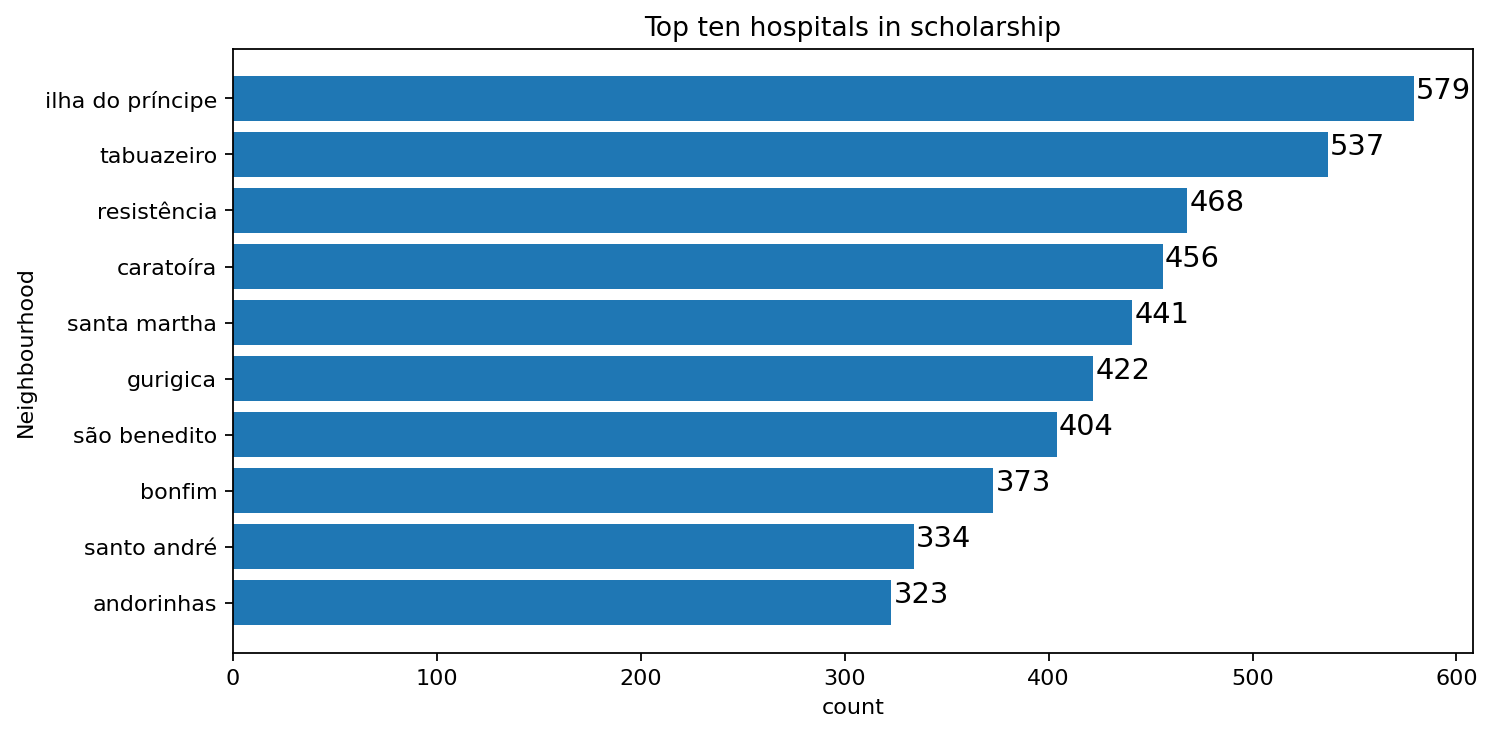

In [40]:
patients_with_Scholarship=df.query("scholarship ==1 ") # get patients who have Scholarship
### get top ten hospitals
top_ten=patients_with_Scholarship.groupby("neighbourhood").count().sort_values(by="scholarship")[-10:].scholarship   

plt.figure(figsize=(10,5), dpi = 160) # make the size of photo and increase the quality of plot

plt.barh(top_ten.index,top_ten.values);  # make a barh for top ten  Neighbourhood  whose  pateints who have Scholarship 

write_text_on_axis("count","Neighbourhood","Top ten hospitals in scholarship") # to write good striing for xlabel and y label an title

for i in range (len(top_ten.values)): # to write the value of each bar on it 
    y_str_to_write=top_ten.values[i]
    plt.text(y_str_to_write+1,i,y_str_to_write,size=13)


> the top ten  Neighbourhood  whose  pateints who have Scholarship are (ascending in values ) 
`[Andorinhas,Santo André,Bonfim,São Benedito,Gurigica,Santa Martha,Caratoíra,Resistência,Tabuazeiro,Ilha Do Príncipe ]`


<a id='conclusions'></a>
## Conclusions


**Along the analysis of no-show appointment data I find some problems in data and I slove it such as renaming columns ,change   wrong data , modify in structre of data (change data type ) , add new features like life stage and month**

**In result of  my analysis I found this**

patients  showed up about less than  25% of them  had illnesses(Hipertension-Alcoholism-Alcoholism-Alcoholism-Handcap,  
average age about 38 years  and about of 80% of all patients , the day in which big number of patients was 2016-06-16,
the most month had a pressure in hospitals  was May with precentage about 72.6% so number of  people who work in hoiptal should be increased , about 21 % of patients who go to hosiptal in thier appointment go more than once and about 80% of males and females do show up and about 20% of males and females do not  show up  .

patients  of whole data set had  range of age from  0 to 115 years old  and average age equal 37 years old ,
about 27.2% of patients were middle age adult( 40-59 years) , 26.1 % are adult(20-39 years )  and 19.2 are senior adult(60+)  and about 27.6 are less than 18 years old, about 65% of patients  are females  and 35% of patients  are males.

increasing the age of patients make number of patients in illness `[Hipertension	Diabetes Handcap ]` increase until reach maximium number of patients in senor adults(60+ years old), but in alcoholism illness increasing the age of patients make number of patients in illness until reach maximium number of patients in middle age adult (40-59 years old ) but decrease insenor adults(60+ years old)  and  number of whiole patients decreased from patients of illness 'hipertension' to illness 'diabetes', to illness 'alcoholism',to illness 'handcap'

there are  7 males and 6 females had  all diseases (Hipertension-Alcoholism-Alcoholism-Alcoholism-Handcap),
the top ten  Neighbourhood  whose  pateints who have Scholarship are (ascending in values ) `[Andorinhas,Santo André,Bonfim,São Benedito,Gurigica,Santa Martha,Caratoíra,Resistência,Tabuazeiro,Ilha Do Príncipe ]`


**Data limiting**
- there is a patient have an age -1  I mover it to  seperatted data frame because i can't deal with it 


In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295